# G2EGM

This notebook produces the timing and accuracy results for the comparison of **NEGM** and **G$^2$EGM** in [A Guide to Solve Non-Convex Consumption-Saving Models](https://doi.org/10.1007/s10614-020-10045-x).

# Setup

In [11]:
%load_ext autoreload
%autoreload 2

import numpy as np

from figs import retirement, decision_functions, segments

np.seterr(all='ignore')  # ignoring all warnings

# load the G2EGMModel module
from G2EGMModel import G2EGMModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Choose number of threads in numba

In [12]:
import numba as nb

nb.set_num_threads(1)

# Settings

In [13]:
T = 20
Neta = 16
var_eta = 0.1 ** 2
do_print = False

# Timing function

In [14]:
def timing(model,
           rep=1,  # set to 5 in the paper
           do_print=True):
    name = model.name
    par = model.par

    time_best = np.inf
    for i in range(rep):

        model.solve()
        model.calculate_euler()

        tot_time = np.sum(model.par.time_work)
        if do_print:
            print(f'{i}: {tot_time:.2f} secs, euler: {np.nanmean(model.sim.euler):.3f}')

        if tot_time < time_best:
            time_best = tot_time
            model_best = model.copy('best')

    model_best.name = name
    return model_best

# G2EGM

In [15]:
model_G2EGM_shocks = G2EGMModelClass(name='G2EGM_shocks',
                                     par={'solmethod': 'G2EGM', 'T': T, 'do_print': do_print, 'Neta': Neta,
                                          'var_eta': var_eta})
model_G2EGM_shocks.precompile_numba()
model_G2EGM_shocks = timing(model_G2EGM_shocks)

0: 61.73 secs, euler: -5.758


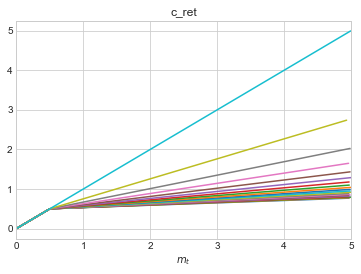

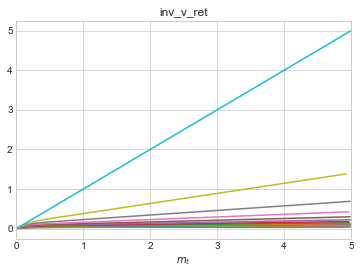

In [16]:
retirement(model_G2EGM_shocks)

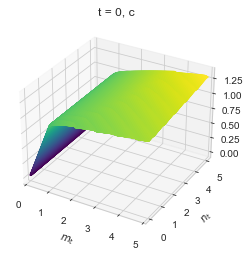

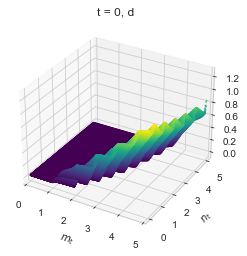

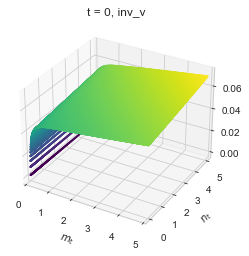

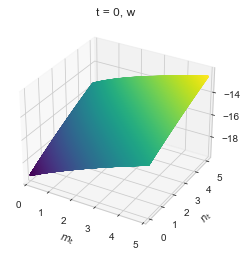

In [17]:
decision_functions(model_G2EGM_shocks, 0)

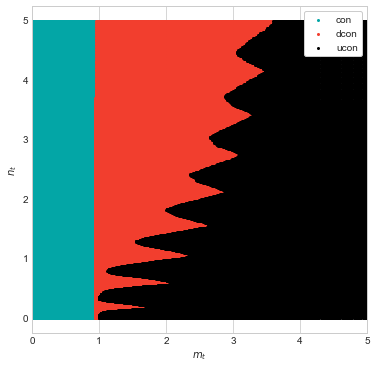

In [18]:
segments(model_G2EGM_shocks, 0)